In [44]:
import os
from pyspark.sql import SparkSession
from pyspark import SparkConf

# spark 세션 생성.
# spark 세션 생성 시에 k8s api 서버를 통해 executor pod가 생성됨.

app_name="spark-notebook-BuildABrain"
notebook_name="spark-notebook"
notebook_namespace="demo01-kubeflow"

spark = (
    SparkSession.builder.appName(app_name)
    .master("k8s://https://kubernetes.default.svc.cluster.local:443")
    .config("spark.submit.deployMode", "client")
    .config("spark.executor.instances", "1")
    .config("spark.executor.memory", "1G")
    .config("spark.driver.memory", "1G")
    .config("spark.executor.cores", "1")
    .config("spark.kubernetes.namespace", notebook_namespace)
    .config("spark.kubernetes.container.image", "paasup/spark:3.5.2-java17-python3.11")
    .config("spark.kubernetes.authenticate.driver.serviceAccountName", "default-editor")
    .config("spark.kubernetes.driver.pod.name", os.environ["HOSTNAME"])
    .config("spark.driver.bindAddress", "0.0.0.0")
    .config("spark.driver.host", notebook_name+ "-headless." + notebook_namespace + ".svc.cluster.local")
    .config("spark.driver.port", "51810")        # AuthorizationPolicy에 전체 포트 허용 시 생략가능
    .config("spark.broadcast.port", "51811")     # AuthorizationPolicy에 전체 포트 허용 시 생략가능
    .config("spark.blockManager.port", "51812")  # AuthorizationPolicy에 전체 포트 허용 시 생략가능
    .getOrCreate()
)

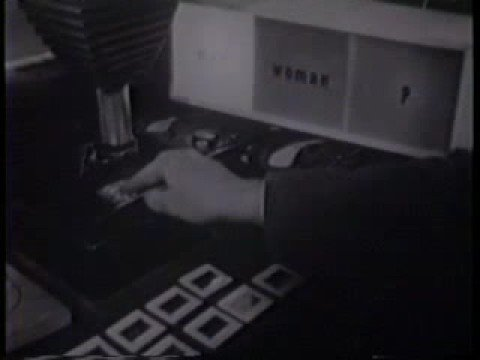

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

In [26]:
# tensorflow에게 GPU가 있는 경우 GPU인식 
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

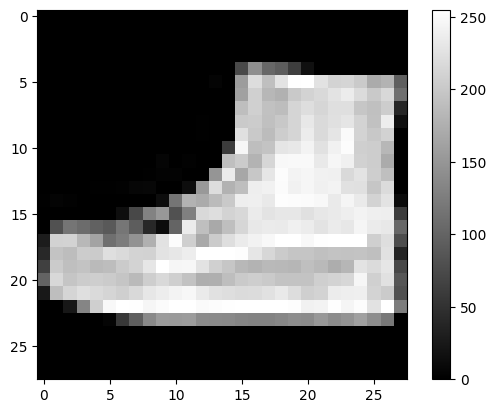

In [28]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 1556

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
train_labels[data_idx]

np.uint8(9)

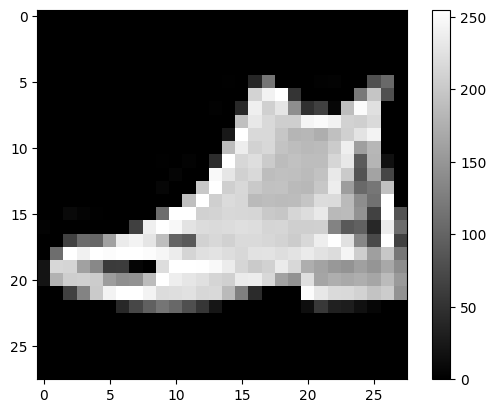

In [30]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 1230

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
valid_labels[data_idx]

np.uint8(9)

In [32]:
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,  38, 117,   0,   0,   0,   2,   3,   0,   0,  80,
        106,   0],
       [  

In [33]:
number_of_classes = train_labels.max() + 1
number_of_classes

np.uint8(10)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
print(number_of_classes)
print( 28*28*10)

10
7840


In [36]:
image_height = 28.
image_width = 28.

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

np.float64(7840.0)

In [16]:
!pip install pydot

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6884 - loss: 24.9916 - val_accuracy: 0.7904 - val_loss: 11.8747
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7946 - loss: 11.6015 - val_accuracy: 0.7930 - val_loss: 10.8325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7941 - loss: 10.9920 - val_accuracy: 0.7952 - val_loss: 13.5402
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8035 - loss: 10.3764 - val_accuracy: 0.7909 - val_loss: 12.4601
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8036 - loss: 9.9284 - val_accuracy: 0.7482 - val_loss: 16.8190


In [40]:
model.predict(train_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[ -339.39935 ,  -717.73737 ,  -112.08066 ,   -22.526003,
         -114.63687 ,   436.88864 ,     4.200445,   545.9762  ,
          129.56718 ,   656.26514 ],
       [  381.06073 ,  -231.48465 ,   369.326   ,   164.30699 ,
           56.11458 , -1191.5687  ,   317.69507 , -1390.5125  ,
          -76.36512 ,  -722.10443 ],
       [  106.37487 ,    80.941826,   142.58488 ,   154.17647 ,
          133.9555  ,  -433.76892 ,   119.864   ,  -375.40198 ,
          -68.39422 ,  -194.76035 ],
       [  179.51341 ,    54.244034,   259.44058 ,   304.5972  ,
          165.45627 ,  -641.51373 ,   223.78033 ,  -749.0653  ,
          -74.680756,  -568.4464  ],
       [  215.29045 ,   235.96901 ,   248.76755 ,   355.09958 ,
          282.25226 ,  -747.11334 ,   220.40378 ,  -464.79337 ,
          -10.223226,  -728.6183  ],
       [   98.693985,  -113.09541 ,   446.26816 ,   243.313   ,
          248.64867 ,  -650.51324 ,   280.861   , -1178.4065  ,
         -149.07487 ,  -887.8067  ],
       [ -

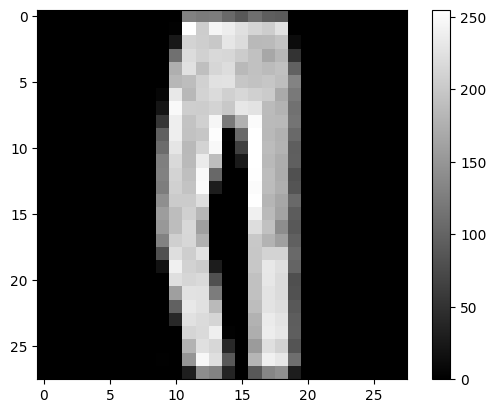

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


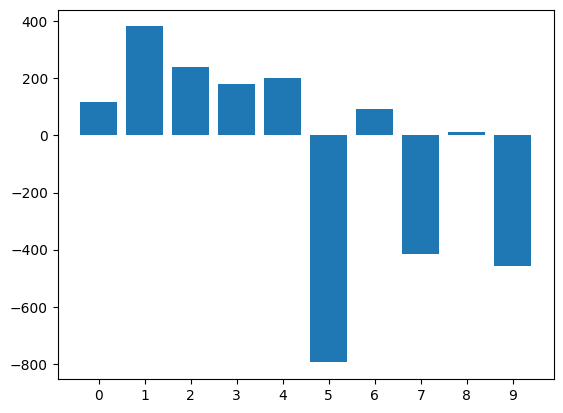

correct answer: 1


In [43]:
data_idx = 1004 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])

In [24]:
spark.stop()

25/05/16 00:48:43 WARN ExecutorPodsWatchSnapshotSource: Kubernetes client has been closed.
